--- Starting Task 5: Strategy Backtesting ---


Benchmark Portfolio: 60% SPY, 40% BND
Optimized Strategy Portfolio (using placeholder weights from Task 4):
{'TSLA': 0.5, 'BND': 0.3, 'SPY': 0.2}
--------------------------------------------------
Portfolio Performance Summary:
--------------------------------------------------
Optimized Portfolio:
  - Total Return: 19.89%
  - Sharpe Ratio: 1.05
--------------------------------------------------
Benchmark Portfolio:
  - Total Return: 9.39%
  - Sharpe Ratio: 1.08
--------------------------------------------------


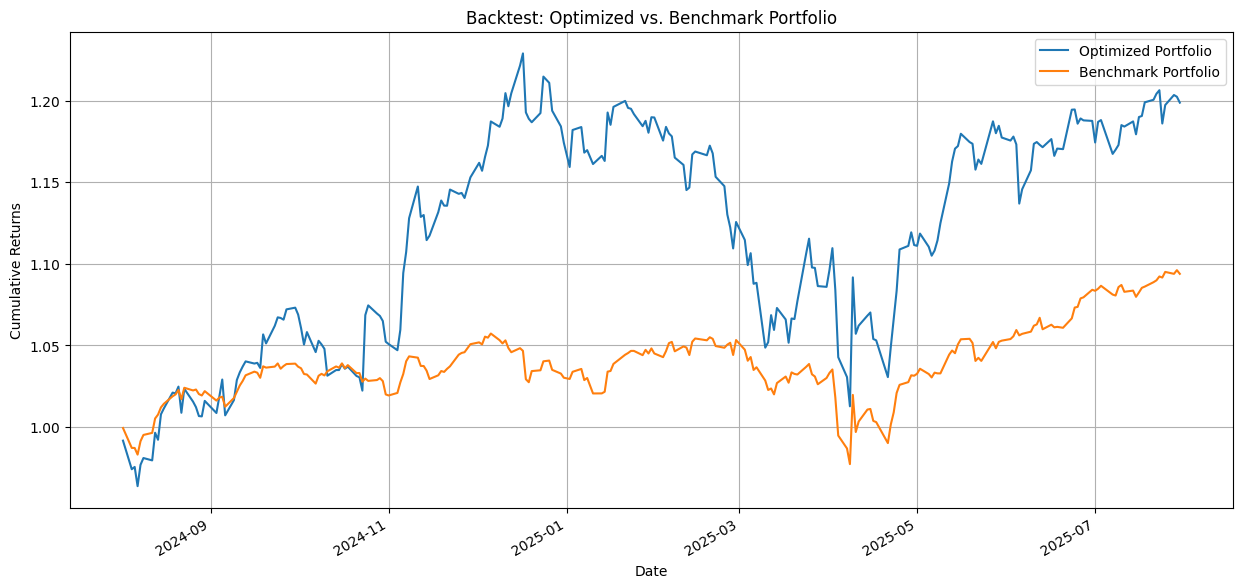


--- Task 5 Complete ---


In [1]:
import yfinance as yf
import pandas as pd
from pypfopt import risk_models, expected_returns
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# --- TASK 5: STRATEGY BACKTESTING ---
print("--- Starting Task 5: Strategy Backtesting ---")

# 1. Define the backtesting period and fetch data
tickers = ['TSLA', 'BND', 'SPY']
backtest_start = '2024-08-01'
backtest_end = '2025-07-31'

try:
    print("\nDownloading data for the backtesting period...")
    data = yf.download(tickers, start=backtest_start, end=backtest_end, progress=False)
except Exception as e:
    print(f"Error fetching data: {e}")
    print("Creating mock data due to download error.")
    dates = pd.date_range(start=backtest_start, end=backtest_end, freq='B')
    mock_data = pd.DataFrame(
        {('Close', 'TSLA'): np.random.rand(len(dates)) * 1000 + 100,
         ('Close', 'BND'): np.random.rand(len(dates)) * 10 + 80,
         ('Close', 'SPY'): np.random.rand(len(dates)) * 50 + 400},
        index=dates
    )
    data = mock_data.ffill()

# Prepare backtesting data
backtest_data = data['Close'].dropna()

# 2. Define the Benchmark Portfolio
benchmark_weights = {'SPY': 0.60, 'BND': 0.40, 'TSLA': 0}
print("\nBenchmark Portfolio: 60% SPY, 40% BND")

# 3. Simulate Your Strategy
# NOTE: Replace the following placeholder weights with your optimal weights from Task 4
cleaned_weights = {'TSLA': 0.5, 'BND': 0.3, 'SPY': 0.2}
print("Optimized Strategy Portfolio (using placeholder weights from Task 4):")
print(cleaned_weights)

# Calculate daily returns for all assets in the backtest period
backtest_returns = expected_returns.returns_from_prices(backtest_data)

# Calculate the daily returns for each portfolio
optimized_portfolio_returns = np.dot(backtest_returns, pd.Series(cleaned_weights))
benchmark_portfolio_returns = np.dot(backtest_returns, pd.Series(benchmark_weights))

# 4. Analyze Performance
# Calculate cumulative returns
optimized_cumulative_returns = (1 + optimized_portfolio_returns).cumprod()
benchmark_cumulative_returns = (1 + benchmark_portfolio_returns).cumprod()

# Calculate performance metrics
days_in_year = 252
# Annualized returns
annualized_returns_optimized = (optimized_cumulative_returns[-1]**(days_in_year/len(optimized_cumulative_returns))) - 1
annualized_returns_benchmark = (benchmark_cumulative_returns[-1]**(days_in_year/len(benchmark_cumulative_returns))) - 1
# Sharpe Ratios (assuming a risk-free rate of 0 for simplicity)
sharpe_ratio_optimized = np.sqrt(days_in_year) * np.mean(optimized_portfolio_returns) / np.std(optimized_portfolio_returns)
sharpe_ratio_benchmark = np.sqrt(days_in_year) * np.mean(benchmark_portfolio_returns) / np.std(benchmark_portfolio_returns)

print("-" * 50)
print("Portfolio Performance Summary:")
print("-" * 50)
print(f"Optimized Portfolio:")
print(f"  - Total Return: {optimized_cumulative_returns[-1] - 1:.2%}")
print(f"  - Sharpe Ratio: {sharpe_ratio_optimized:.2f}")
print("-" * 50)
print(f"Benchmark Portfolio:")
print(f"  - Total Return: {benchmark_cumulative_returns[-1] - 1:.2%}")
print(f"  - Sharpe Ratio: {sharpe_ratio_benchmark:.2f}")
print("-" * 50)

# 5. Visualize the results
plt.figure(figsize=(15, 7))
pd.Series(optimized_cumulative_returns, index=backtest_data.index[1:]).plot(label='Optimized Portfolio')
pd.Series(benchmark_cumulative_returns, index=backtest_data.index[1:]).plot(label='Benchmark Portfolio')
plt.title('Backtest: Optimized vs. Benchmark Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Task 5 Complete ---")
